   Latitude  Longitude Response Unit
0   23.8103    90.4125        Police
1   23.8145    90.4145          Fire
2   23.8200    90.4160     Ambulance
3   23.8300    90.4200        Police
4   23.8350    90.4220          Fire
Accuracy: 0.00%
Classification Report:
              precision    recall  f1-score   support

        Fire       0.00      0.00      0.00       1.0
      Police       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Confusion Matrix:
[[0 1]
 [0 0]]
নিকটতম রেসপন্স ইউনিট: Ambulance


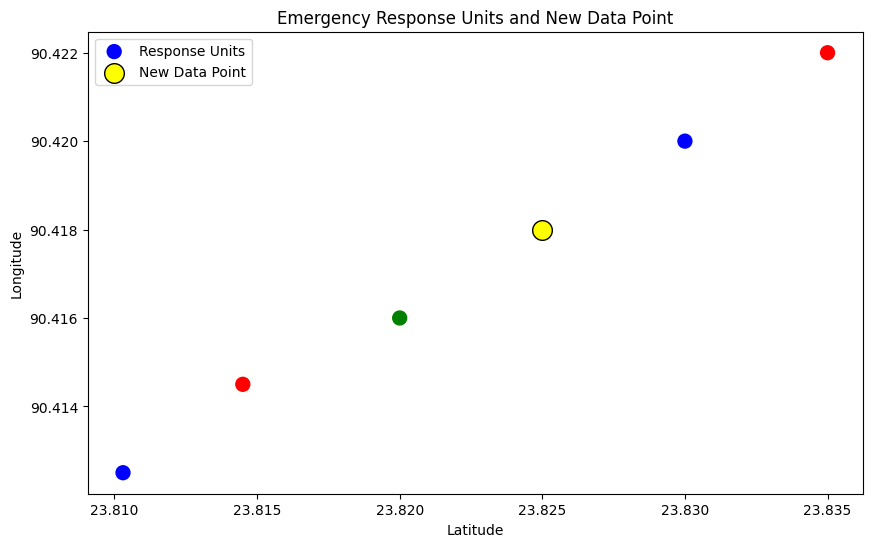

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# উদাহরণ ডেটাসেট
data = {
    'Latitude': [23.8103, 23.8145, 23.8200, 23.8300, 23.8350],
    'Longitude': [90.4125, 90.4145, 90.4160, 90.4200, 90.4220],
    'Response Unit': ['Police', 'Fire', 'Ambulance', 'Police', 'Fire']
}

# ডেটাসেটকে ডেটাফ্রেমে রূপান্তর
df = pd.DataFrame(data)
print(df)

X = df[['Latitude', 'Longitude']]  # ফিচার
y = df['Response Unit']  # লেবেল

# ডেটাসেটকে ট্রেন এবং টেস্ট সেটে বিভক্ত করা
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ফিচার স্কেলিং করা
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# k-NN মডেল তৈরি
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# মডেল ট্রেন করা
knn.fit(X_train, y_train)

# টেস্ট ডেটাসেট দিয়ে প্রিডিকশন
y_pred = knn.predict(X_test)

# মডেল কার্যকারিতা যাচাই
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# ক্লাসিফিকেশন রিপোর্ট
print("Classification Report:")
print(classification_report(y_test, y_pred))

# কনফিউশন ম্যাট্রিক্স
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# নতুন ডেটা পয়েন্ট
new_data = scaler.transform(np.array([[23.8250, 90.4180]]))

# প্রিডিকশন করা
new_response_unit = knn.predict(new_data)
print(f"নিকটতম রেসপন্স ইউনিট: {new_response_unit[0]}")

# ডেটাসেটের রেসপন্স ইউনিটের ক্লাস অনুযায়ী কালার নির্ধারণ
colors = {'Police': 'blue', 'Fire': 'red', 'Ambulance': 'green'}

# গ্রাফ আঁকা
plt.figure(figsize=(10, 6))
plt.scatter(df['Latitude'], df['Longitude'], c=df['Response Unit'].apply(lambda x: colors[x]), s=100, label='Response Units')

# নতুন ডেটা পয়েন্ট প্রদর্শন করা
new_data_point = [23.8250, 90.4180]
plt.scatter(new_data_point[0], new_data_point[1], c='yellow', edgecolor='black', s=200, label='New Data Point')

# লেবেল এবং টাইটেল সেট করা
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Emergency Response Units and New Data Point')
plt.legend(loc='upper left')

# গ্রাফ দেখানো
plt.show()
